# Tips for using colab Environment


## Click the following URL to load this notebook on Colab environment

* https://colab.research.google.com/github/ch6845/dynamic-cell-classifier/blob/master/3_DCC.ipynb

* You can use free GPUs from Google on Colab. (For more information, see https://colab.research.google.com/notebooks/welcome.ipynb)

## Enabling and testing the GPU
* Navigate to Edit→Notebook Settings
* select GPU from the Hardware Accelerator drop-down

## Load data
* Upload your data or, mount a storage to Colab virtual environment.
(For more information, see https://colab.research.google.com/notebooks/io.ipynb)

In [1]:
import datetime

import numpy as np
import pandas as pd

from scipy.io import mmread

import matplotlib.pyplot as plt

In [2]:
import os
os.__file__

'/home/ch6845/tools/miniconda3/envs/pytorch/lib/python3.6/os.py'

# load data

## expression data

In [3]:
exp_data=mmread('data/HumanLiver_extract/HumanLiver.data.counts.mm').toarray().astype(float)
with open('data/HumanLiver_extract/HumanLiver.data.col','r') as f: exp_data_col=[i.strip().strip('"') for i in f.read().split()]
with open('data/HumanLiver_extract/HumanLiver.data.row','r') as f: exp_data_row=[i.strip().strip('"') for i in f.read().split()]
assert exp_data.shape==(len(exp_data_row),len(exp_data_col))

In [4]:
assert len(set(exp_data_row))==len(exp_data_row)
assert len(set(exp_data_col))==len(exp_data_col)

In [5]:
exp_data,exp_data.shape

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]), (20007, 8444))

In [6]:
exp_data_row[:5],exp_data_col[:5]

(['RP11-34P13.7', 'FO538757.2', 'AP006222.2', 'RP4-669L17.10', 'RP5-857K21.4'],
 ['P1TLH_AAACCTGAGCAGCCTC_1',
  'P1TLH_AAACCTGTCCTCATTA_1',
  'P1TLH_AAACCTGTCTAAGCCA_1',
  'P1TLH_AAACGGGAGTAGGCCA_1',
  'P1TLH_AAACGGGGTTCGGGCT_1'])

## cluster info 

In [7]:
exp_data_meta=pd.read_csv('data/HumanLiver_extract/HumanLiver.metadata.tsv',sep='\t')
exp_data_meta.head()

,total_counts,total_features,orig.ident,res.0.8,S.Score,G2M.Score,Phase,tSNE_1,tSNE_2
P1TLH_AAACCTGAGCAGCCTC_1,2943,1427,P1TLH,12,0.046089,0.000349,S,12.331038,4.044869
P1TLH_AAACCTGTCCTCATTA_1,10897,2522,P1TLH,17,-0.000357,0.009434,G2M,-10.186342,-50.465799
P1TLH_AAACCTGTCTAAGCCA_1,1914,1018,P1TLH,12,0.012811,-0.056561,S,15.618844,6.213892
P1TLH_AAACGGGAGTAGGCCA_1,5574,1798,P1TLH,10,-0.011324,-0.047102,G1,4.710776,10.386157
P1TLH_AAACGGGGTTCGGGCT_1,3700,1417,P1TLH,2,0.057467,-0.003861,S,-14.954216,19.197842


`clusterid_to_clustername` is used to convert integers in `res.0.8` to cell-type name

In [8]:
clusterid_to_clustername=pd.read_csv('data/HumanLiver_extract/HumanLiver.clusterid_to_clustername.tsv',sep='\t',header=None,index_col=0)
clusterid_to_clustername[1]=clusterid_to_clustername[1].str.replace(' ','_')
len(clusterid_to_clustername[1].unique()),

(11,)

# Panglao

In [9]:
markers_db=pd.read_csv("data/PanglaoDB_markers_27_Mar_2020.tsv.gz",sep='\t')
markers_db=markers_db[markers_db['species'].str.contains('Hs')].drop(columns='species')
markers_db.head()

,official gene symbol,cell type,nicknames,ubiquitousness index,product description,gene type,canonical marker,germ layer,organ,sensitivity_human,sensitivity_mouse,specificity_human,specificity_mouse
0,CTRB1,Acinar cells,CTRB,0.017,chymotrypsinogen B1,protein-coding gene,1.0,Endoderm,Pancreas,1.000000,0.957143,0.000629,0.015920
1,KLK1,Acinar cells,Klk6,0.013,kallikrein 1,protein-coding gene,1.0,Endoderm,Pancreas,0.833333,0.314286,0.005031,0.012826
2,RBPJL,Acinar cells,RBP-L|SUHL|RBPSUHL,0.001,recombination signal binding protein for immun...,protein-coding gene,1.0,Endoderm,Pancreas,0.000000,0.000000,0.000000,0.000000
3,PTF1A,Acinar cells,PTF1-p48|bHLHa29,0.001,pancreas associated transcription factor 1a,protein-coding gene,1.0,Endoderm,Pancreas,0.000000,0.157143,0.000629,0.000773
5,CELA3A,Acinar cells,ELA3|ELA3A,0.001,chymotrypsin like elastase family member 3A,protein-coding gene,1.0,Endoderm,Pancreas,0.833333,0.128571,0.000000,0.000000


In [10]:
#markers_db[(markers_db['official gene symbol']=='FXDY2') |(markers_db['nicknames'].str.contains('FXDY2'))],'FXDY2' in exp_data_row

## Marker info

In [11]:

# New one

clustername_to_markers={'Cholangiocytes':['KRT19','EPCAM','FXYD2','CLDN4','CLDN10','SOX9','MMP7','CXCL1','CFTR','TFF2','KRT7','CD24'],
'Mature_B_cells':['MS4A1','IGHD','CD79A','PTPRC','IGKC','CD19'],
'Hepatocytes':['ALB','HAMP','ARG1','PCK1','AFP','BCHE'],
'LSECs':['CALCRL','VWF','PECAM1','CLEC14A','EMCN'],
'Hepatic_Stellate_Cells':['ACTA2','COL1A1','TAGLN','COL1A2','COL3A1','SPARC','RBP1','DCN','MYL9'],
'Macrophages':['CD68','MARCO','FCGR3A','LYZ','PTPRC','AIF1'],
'ab_T_cells':['CD2','CD3D','TRAC','IL32','CD3E','PTPRC'],
'gd_T_cells':['NKG7','FCGR3A','HOPX','GNLY','CMC1','KLRF1','CCL3','PTPRC'],
'NK_cells':['GZMK','KLRF1','CCL3','CMC1','NKG7','PTPRC'],
'Plasma_cells':['CD27','IGHG1','IGHA1','IGHM','CD79A','PTPRC','IGKC'],
'Erythroid_cells':['HBB','SLC25A37','CA1','ALAS2'],
'other':[]                           
}




# Old one
"""
clustername_to_markers={'Hepatocytes':['ALB','HAMP','ARG1','PCK1','AFP','BCHE'],
'LSECs':['CALCRL','FCGR2B','VWF'],
'Cholangiocytes':['KRT19','EPCAM','FXYD2','CLDN4','CLDN10','SOX9','MMP7','CXCL1','CFTR','TFF2','KRT7','CD24'],
'Hepatic_Stellate_Cells':['ACTA2','COL1A1','TAGLN','COL1A2','COL3A1','SPARC','RBP1','DCN','MYL9'],
'Macrophages':['CD68','MARCO'],
'ab_T_cells':['CD2','CD3D','TRAC','IL32','CD3E'],
'gd_T_cells':['NKG7','FCGR3A','HOPX','GNLY'],
'NK_cells':['GZMK','KLRF1','CCL3','CMC1'],
'Plasma_cells':['CD27','IGHG1'],
'Mature_B_cells':['MS4A1','LTB','CD52','IGHD'],
'Erythroid_cells':['HBB','SLC25A37','CA1','ALAS2'],
'other':[]    
}
"""

#for key,value in clustername2markers_new.items():
#    for i in value:
#        print(markers_db[(markers_db['official gene symbol']==i)].shape)
#markers_db[(markers_db['official gene symbol']=='CD32B') |(markers_db['nicknames'].str.contains('CD32B'))]
#clustername_to_markers

"\nclustername_to_markers={'Hepatocytes':['ALB','HAMP','ARG1','PCK1','AFP','BCHE'],\n'LSECs':['CALCRL','FCGR2B','VWF'],\n'Cholangiocytes':['KRT19','EPCAM','FXYD2','CLDN4','CLDN10','SOX9','MMP7','CXCL1','CFTR','TFF2','KRT7','CD24'],\n'Hepatic_Stellate_Cells':['ACTA2','COL1A1','TAGLN','COL1A2','COL3A1','SPARC','RBP1','DCN','MYL9'],\n'Macrophages':['CD68','MARCO'],\n'ab_T_cells':['CD2','CD3D','TRAC','IL32','CD3E'],\n'gd_T_cells':['NKG7','FCGR3A','HOPX','GNLY'],\n'NK_cells':['GZMK','KLRF1','CCL3','CMC1'],\n'Plasma_cells':['CD27','IGHG1'],\n'Mature_B_cells':['MS4A1','LTB','CD52','IGHD'],\n'Erythroid_cells':['HBB','SLC25A37','CA1','ALAS2'],\n'other':[]    \n}\n"

In [12]:
clustername_unique=list(clustername_to_markers.keys())
exp_data_meta_clusterid_clusteridunique=clusterid_to_clustername.loc[exp_data_meta['res.0.8'].values][1].apply(lambda x: clustername_unique.index(x))

In [13]:
marker_unique=np.unique([j for i in list(clustername_to_markers.values()) for j in i])
marker_unique_exp_data_idx=[exp_data_row.index(marker) for marker in marker_unique]
marker_unique,len(marker_unique)

(array(['ACTA2', 'AFP', 'AIF1', 'ALAS2', 'ALB', 'ARG1', 'BCHE', 'CA1',
        'CALCRL', 'CCL3', 'CD19', 'CD2', 'CD24', 'CD27', 'CD3D', 'CD3E',
        'CD68', 'CD79A', 'CFTR', 'CLDN10', 'CLDN4', 'CLEC14A', 'CMC1',
        'COL1A1', 'COL1A2', 'COL3A1', 'CXCL1', 'DCN', 'EMCN', 'EPCAM',
        'FCGR3A', 'FXYD2', 'GNLY', 'GZMK', 'HAMP', 'HBB', 'HOPX', 'IGHA1',
        'IGHD', 'IGHG1', 'IGHM', 'IGKC', 'IL32', 'KLRF1', 'KRT19', 'KRT7',
        'LYZ', 'MARCO', 'MMP7', 'MS4A1', 'MYL9', 'NKG7', 'PCK1', 'PECAM1',
        'PTPRC', 'RBP1', 'SLC25A37', 'SOX9', 'SPARC', 'TAGLN', 'TFF2',
        'TRAC', 'VWF'], dtype='<U8'), 63)

In [14]:
pi_true=np.array([np.sum(exp_data_meta_clusterid_clusteridunique==i) for i in sorted(np.unique(exp_data_meta_clusterid_clusteridunique))])/exp_data_meta_clusterid_clusteridunique.shape[0]
M_true=np.array([np.mean(exp_data[marker_unique_exp_data_idx,:][:,exp_data_meta_clusterid_clusteridunique==i],axis=1) for i in sorted(np.unique(exp_data_meta_clusterid_clusteridunique))])

In [15]:
cell_size_factor=pd.read_csv('data/analysis/size_factor_cluster.tsv',sep='\t',header=None)[0].values.astype(float)#.reshape(-1,1)
#cell_size_factor=np.ones_like(cell_size_factor)
cell_size_factor.shape

(8444,)

In [16]:
Y=exp_data[marker_unique_exp_data_idx].transpose().astype(float)
Y.shape

(8444, 63)

In [17]:
marker_onehot=np.array([np.sum(np.eye(len(marker_unique))[[marker_unique.tolist().index(marker) for marker in value]],axis=0) for key,value in clustername_to_markers.items()])
marker_onehot.shape
#marker_onehot.T

(12, 63)

In [18]:
exp_data_col_patient=pd.Series(exp_data_col).str.slice(start=1,stop=2).astype(int).values
x_data_covariate=np.eye(len(np.unique(exp_data_col_patient)))[exp_data_col_patient-1]
x_data_intercept=np.array([np.ones(Y.shape[0])]).transpose()
x_data_null=np.concatenate([x_data_intercept,x_data_covariate[:,:]],axis=1)
x_data_null.shape

(8444, 6)

# Torch porting

In [19]:
# Asuume that the following variables are initialized

# Input
Y
s=cell_size_factor
#X=x_data_null.copy()[:,[0, 1,2,3,4]]
#X=x_data_null.copy()[:,[0, 1,2]]
#X=x_data_null.copy()[:,[0,1,2,3]]
X=x_data_null.copy()[:,[0,1,2]]
# 234 x
# 34 x
# 123 x
rho=marker_onehot

delta_min=2
B=10
LR=1e-1

# Optional
EM_ITER_MAX=20
M_ITER_MAX=10000

BATCH_SIZE=Y.shape[0]
NUM_WORKERS=0

LOWER_BOUND=1e-10
THETA_LOWER_BOUND=1e-20


Q_diff_tolerance=1e-4
LL_diff_tolerance=1e-4
X.shape

(8444, 3)

In [20]:
import math
import numpy as np

import torch
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
from torch.nn.parameter import Parameter

from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [21]:
torch.set_default_dtype(torch.float64) 

In [22]:
device_cpu=torch.device("cpu")
device_cuda_list=[torch.device("cuda:{}".format(i)) for i in range(6)][::-1]

In [23]:
#from basic_tools import Cell_Dataset,Masked
class Masked_Function(torch.autograd.Function):
    @staticmethod
    def forward(ctx, input, mask):
        #print('aaaa')
        output=input
        ctx.save_for_backward(input, mask)
        return output

    @staticmethod
    def backward(ctx, grad_output):
        input, mask = ctx.saved_tensors
        grad_input = grad_mask = None
        if ctx.needs_input_grad[0]:
            grad_input = grad_output.mul(mask)

        return grad_input, grad_mask
    
class Masked(nn.Module):    
    def __init__(self, mask):    
        super(Masked, self).__init__()
        
        self.mask = nn.Parameter(torch.Tensor(mask)==1, requires_grad=False)    
        
        
    def forward(self, input):
        return Masked_Function.apply(input, self.mask)

    def extra_repr(self):
        return 'mask={}'.format(self.mask.shape)  

In [24]:
import math
class NB_logprob(nn.Module):
    def __init__(self):
        super(NB_logprob,self).__init__()
        
    def forward(self,total_count,probs,value):
        
        #eps = torch.finfo(probs.dtype).eps
        #probs_clamped=probs.clamp(min=eps, max=1 - eps)        
        probs_clamped=probs
        logits=torch.log(probs_clamped) - torch.log1p(-probs_clamped)
        #logits=torch.log(probs_clamped)
        
        log_unnormalized_prob = (total_count * F.logsigmoid(-logits) +
                                 value * F.logsigmoid(logits))
        log_normalization = (-torch.lgamma(total_count + value) + torch.lgamma(1. + value) +
                             torch.lgamma(total_count))

        return log_unnormalized_prob - log_normalization
    
class Normal_logprob(nn.Module):
    def __init__(self):
        super(Normal_logprob,self).__init__()
        
    def forward(self,loc,scale,value):
    
        var = (scale ** 2)
        log_scale = torch.log(scale)
        
        
        #print(loc.shape,scale.shape,value.shape)
        return -((value - loc) ** 2) / (2 * var) - log_scale - math.log(math.sqrt(2 * math.pi))    
        #return log_scale
        
class Poisson_logprob(nn.Module):
    def __init__(self):
        super(Poisson_logprob,self).__init__()
        
    def forward(self,rate,value):
        #rate=rate.clamp(min=1e-3)+(-1)/rate.clamp(max=-1e-5)
        
        return (rate.log() * value) - rate - (value + 1).lgamma()
    
class Dirichlet_logprob(nn.Module):
    def __init__(self):
        super(Dirichlet_logprob,self).__init__()
        
    def forward(self,concentration,value):
        
        return ((torch.log(value) * (concentration - 1.0)).sum(-1) +
                torch.lgamma(concentration.sum(-1)) -
                torch.lgamma(concentration).sum(-1))
    
        
NB_logprob=NB_logprob()        
normal_logprob=Normal_logprob()
poisson_logprob=Poisson_logprob()
dirichlet_logprob=Dirichlet_logprob()

In [44]:
delta_random=np.random.uniform(-2,2,size=rho.shape)

In [29]:
cell_dataset=Cell_Dataset(Y,X,s)
cell_dataloader=DataLoader(dataset=cell_dataset,shuffle=False,batch_size=BATCH_SIZE,num_workers=NUM_WORKERS)

In [217]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.distributions.negative_binomial import NegativeBinomial
from torch.distributions.normal import Normal
from torch.distributions.dirichlet import Dirichlet

class Custom_Model(nn.Module):
    def __init__(self,Y,rho,X_col=5,delta_min=2,LOWER_BOUND=1e-10,THETA_LOWER_BOUND=1e-20):
        # Y,rho are needed for model parameter initialization
        super(Custom_Model, self).__init__()
         
        #delta
        self.delta_log_min=np.log(delta_min) #
        self.delta_log=nn.Parameter(torch.Tensor(delta_random),requires_grad=True) # (C,G)
        
        #beta
        Y_colmean=np.mean(Y,axis=0)
        beta_init=np.hstack([((Y_colmean-Y_colmean.mean())/np.std(Y_colmean)).reshape(-1,1),\
                     np.zeros((Y.shape[1],X_col-1))]).T
        self.beta=nn.Parameter(torch.Tensor(beta_init),requires_grad=True) # (P,G)
        
    def forward(self,Y,X,s,gamma_fixed=None,mode='E'):
        delta=torch.exp(self.delta_log)
        
        X_beta_s=X.matmul(self.beta)+torch.log(s.view(-1, 1)) #(N,P)*(P,G) + (N,1) = (N,G)
        
        mu_log=X_beta_s.unsqueeze(dim=1).repeat(1,delta.shape[0],1)+delta #(N,1,G)+(C,G) = (N,C,G)
        
        mu=torch.exp(mu_log) # (N,C,G)
        
        #Y_extend=Y.view(Y.shape[0],1,Y.shape[1]).repeat(1,mu_log.shape[1],1) # (N,C,G)
        Y_extend=Y.unsqueeze(dim=1).repeat(1,mu_log.shape[1],1)
        
        # Poisson
        Y_logprob=poisson_logprob(rate=mu,value=Y_extend) # (N,C,G)
        
        Y_logprob_reduce=torch.sum(Y_logprob,axis=2)
        
        Y_logprob_reduce_reduce=torch.logsumexp(Y_logprob_reduce,dim=1).view(-1,1) # (N,1)
        
        gamma=torch.exp(Y_logprob_reduce-Y_logprob_reduce_reduce) # (N,C)

        if mode=='E':
            return gamma,None,None
        elif mode=='M' or mode=='LL':
            if mode=='M':
                Q=-torch.sum(gamma_fixed*Y_logprob_reduce) # (N,C) (N,C)
                return gamma,Q,None
            elif mode=='LL':      
                LL=torch.sum(Y_logprob_reduce_reduce) # product of likelihood(y_i)-> (1) 
                return gamma,None,LL
        else:
            raise          

In [161]:
import numba as nb
from numba import prange, njit
import scipy.special as sc

@njit
def logsumexp(vec):
    val = vec[-1]
    for i in range(vec.shape[0]-1):
        val = np.logaddexp(val, vec[i])
    return val


@njit
def log_poisson_pdf(n, mu):
    return sc.xlogy(n, mu) - sc.gammaln(n+1) - mu

@njit
def get_log_poisson_prod(ns, mus):
    val = 0
    for g in range(ns.shape[0]):
        val += log_poisson_pdf(ns[g], mus[g])
    return val

@njit(parallel=True)
def MuProd(N, X, Beta, Gamma, S):
    n, g, p, t = N.shape[0], Beta.shape[0], Beta.shape[1], Gamma.shape[1]
    Mu = np.zeros(shape=(n, g, t))
    Xbeta = X @ Beta.T
    for i in prange(N.shape[0]):
        Mu[i] = np.exp(Xbeta[i].reshape(g,1) + Gamma) * S[i]

    Prod = np.zeros(shape=(n, t))
    for i in prange(n):
        for j in range(t):
            Prod[i,j] = get_log_poisson_prod(N[i], Mu[i,:,j])

    return Mu, Prod


@njit(parallel=True)
def target_grad(N, X, Beta, Gamma, S, Mark=np.zeros(0)):
    n_sample, g, p, t = N.shape[0], Beta.shape[0], Beta.shape[1], Gamma.shape[1]
    # call Mu and Prod
    Mu, Prod = MuProd(N, X, Beta, Gamma, S)
    
    # compute target and grad
    target = 0
    grad_Beta = np.zeros(shape=Beta.shape)
    grad_Gamma = np.zeros(shape=Gamma.shape)
    for i in prange(n_sample):
        # target
        target += logsumexp(Prod[i])

        # gradient
        A = -Mu[i] + N[i].reshape(g,1)
        B = np.exp(Prod[i] - logsumexp(Prod[i]))

        grad_Beta += (A @ B.reshape((t,1))) @ X[i].reshape((1,p))
        grad_Gamma += np.dot(A, np.diag(B))
    
    # do not update non-marker gene if Mark provided
    #if Mark.shape[0] > 0:
        #grad_Gamma = np.multiply(grad_Gamma, Mark)
    
    return -target/n_sample, -grad_Beta/n_sample, -grad_Gamma/n_sample

In [183]:

@njit(parallel=True)
def target_grad_(N, X, Beta, Gamma, S, Mu,Prod,Mark=np.zeros(0)):
    n_sample, g, p, t = N.shape[0], Beta.shape[0], Beta.shape[1], Gamma.shape[1]
    # call Mu and Prod
    
    # compute target and grad
    target = 0
    grad_Beta = np.zeros(shape=Beta.shape)
    grad_Gamma = np.zeros(shape=Gamma.shape)
    for i in prange(n_sample):
        # target
        target += logsumexp(Prod[i])

        # gradient
        A = -Mu[i] + N[i].reshape(g,1)
        B = np.exp(Prod[i] - logsumexp(Prod[i]))

        grad_Beta += (A @ B.reshape((t,1))) @ X[i].reshape((1,p))
        grad_Gamma += np.dot(A, np.diag(B))
    
    # do not update non-marker gene if Mark provided
    #if Mark.shape[0] > 0:
        #grad_Gamma = np.multiply(grad_Gamma, Mark)
    
    return -target/n_sample, -grad_Beta/n_sample, -grad_Gamma/n_sample

In [175]:
a,b,c=target_grad(batch_Y.detach().numpy(),batch_X.detach().numpy(),model.beta.detach().numpy().T,model.delta_log.detach().numpy().T,batch_s.detach().numpy())

In [231]:
(target_grad_(batch_Y.detach().numpy(),batch_X.detach().numpy(),model.beta.detach().numpy().T,model.delta_log.detach().numpy().T,batch_s.detach().numpy(),mu.transpose(1,2).detach().numpy(),Y_logprob_reduce.detach().numpy()))[1]*8444

array([[ 4.14104303e+05,  6.75288591e+04,  3.55251356e+04],
       [ 3.88072566e+05,  6.67078910e+04,  2.93493857e+04],
       [ 1.08179119e+04, -1.10616379e+03,  2.73488929e+03],
       [ 8.72241703e+03,  1.59439890e+03,  7.51682679e+02],
       [ 6.90908307e+06,  1.22528381e+06,  5.58384881e+05],
       [ 4.51099159e+05,  7.77380234e+04,  3.40304923e+04],
       [ 1.07763635e+04,  1.92319589e+03,  1.37442987e+03],
       [ 3.61723778e+03,  1.25198895e+03,  4.97759535e+02],
       [ 1.02119976e+04,  1.65521939e+03,  8.78840103e+02],
       [ 3.54517298e+05,  6.06096744e+04,  2.80821673e+04],
       [ 2.15021841e+06,  3.69113938e+05,  1.62516468e+05],
       [ 7.18739520e+04,  3.01614112e+03,  9.90859377e+03],
       [ 2.04462639e+04,  3.49647056e+03,  1.47000604e+03],
       [ 7.09083649e+04,  1.17572666e+04,  5.38867286e+03],
       [ 8.74868174e+03,  1.23270423e+03,  9.88058031e+02],
       [ 1.30758818e+04,  1.78597853e+03,  1.16888069e+03],
       [ 4.65282023e+06,  7.97645683e+05

In [252]:
c=(target_grad_(batch_Y.detach().numpy(),batch_X.detach().numpy(),model.beta.detach().numpy().T,model.delta_log.detach().numpy().T,batch_s.detach().numpy(),mu.transpose(1,2).detach().numpy(),Y_logprob_reduce.detach().numpy()))[2]*8444

In [270]:
c[:5]

array([[-0.00000000e+000, -0.00000000e+000,  2.10641089e+004,
         3.92736973e+005, -0.00000000e+000,  2.59971157e+002,
         5.84550568e-104,  8.44321928e-001, -0.00000000e+000,
         4.24061048e+001, -0.00000000e+000, -0.00000000e+000],
       [-0.00000000e+000, -0.00000000e+000,  9.91228535e+001,
         3.87776214e+005, -0.00000000e+000,  6.30731732e+001,
         1.38449225e-103,  1.89512022e+001, -0.00000000e+000,
         1.15204584e+002, -0.00000000e+000, -0.00000000e+000],
       [-0.00000000e+000, -0.00000000e+000,  8.55693684e+003,
         1.73198177e+003, -0.00000000e+000,  4.81804593e+001,
         2.40295314e-103,  3.07571148e-001, -0.00000000e+000,
         4.80505239e+002, -0.00000000e+000, -0.00000000e+000],
       [-0.00000000e+000, -0.00000000e+000,  2.16373928e+002,
         9.17676584e+003, -0.00000000e+000,  3.35144339e+001,
         1.67737594e-103, -6.77699246e+001, -0.00000000e+000,
        -6.36467241e+002, -0.00000000e+000, -0.00000000e+000],
    

In [273]:
delta_grad.T[:5]

tensor([[ 0.0000e+00,  0.0000e+00,  2.1064e+04,  3.9274e+05,  0.0000e+00,
          2.5997e+02, 5.8455e-104,  8.4432e-01,  0.0000e+00,  4.2406e+01,
          0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  9.9123e+01,  3.8778e+05,  0.0000e+00,
          6.3073e+01, 1.3845e-103,  1.8951e+01,  0.0000e+00,  1.1520e+02,
          0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  8.5569e+03,  1.7320e+03,  0.0000e+00,
          4.8180e+01, 2.4030e-103,  3.0757e-01,  0.0000e+00,  4.8051e+02,
          0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  2.1637e+02,  9.1768e+03,  0.0000e+00,
          3.3514e+01, 1.6774e-103, -6.7770e+01,  0.0000e+00, -6.3647e+02,
          0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  6.2279e+04,  6.5782e+06,  0.0000e+00,
          1.6597e+05, 1.8270e-100,  5.8269e+04,  0.0000e+00,  4.4345e+04,
          0.0000e+00,  0.0000e+00]], grad_fn=<SliceBackward>)

In [276]:
np.all(np.isclose(c,delta_grad.detach().T))

True

In [182]:
torch.logsumexp(Y_logprob_reduce,dim=1).view(-1,1).sum()

tensor(-20683053.9205, grad_fn=<SumBackward0>)

In [197]:
with torch.no_grad():
    for batch_idx,batch in enumerate(cell_dataloader):
        batch_Y=batch['Y'].to(device)
        batch_X=batch['X'].to(device)
        batch_s=batch['s'].to(device)  

In [242]:
device=device_cpu
model=Custom_Model(Y,rho,X_col=X.shape[1],delta_min=delta_min,LOWER_BOUND=LOWER_BOUND,THETA_LOWER_BOUND=THETA_LOWER_BOUND).to(device)

In [243]:
with torch.no_grad():
    gamma_temp,_,_=model(batch_Y,batch_X,batch_s,gamma_fixed=None,mode='E')

In [237]:
_,Q,_=model(batch_Y,batch_X,batch_s,gamma_fixed=gamma_temp,mode='M')#_,_,LL=model(batch_Y,batch_X,batch_s,gamma_fixed=gamma_temp,mode='LL')

In [245]:
_,_,LL=model(batch_Y,batch_X,batch_s,gamma_fixed=gamma_temp,mode='LL')#_,_,LL=model(batch_Y,batch_X,batch_s,gamma_fixed=gamma_temp,mode='LL')
LL.backward()

In [238]:
Q.backward()

In [255]:
#c=
#np.isclose(c,-model.beta.grad.T)

In [178]:
a*8444,Q,LL

(4872636.085002236, None, tensor(-20683053.9205, grad_fn=<SumBackward0>))

In [101]:
model.delta_log.grad[5],delta_grad[5]

(tensor([ 6.2829e+02,  6.3041e+01,  3.6685e+01,  1.2390e+01,  3.4925e+05,
          1.1223e+03,  6.6232e+03,  7.3122e+00,  2.3879e+03,  1.5176e+01,
          6.1710e+04,  2.4184e+01,  5.4429e+01, -1.8969e+01,  1.4890e+03,
          6.1197e+01,  6.5552e+00, -2.9832e+01,  4.3286e+00,  1.2071e+01,
          2.7357e+01,  7.6733e+00,  7.6254e+00,  2.8476e+02,  7.1157e+03,
          1.4170e+04,  5.6454e+01,  3.3321e+04,  1.7969e+03,  3.3266e+01,
          3.9181e+01,  3.6222e+01,  6.0340e+00,  4.3138e+02,  1.2268e+02,
          5.7704e+02,  2.0729e+01, -1.3299e+04,  6.4671e+01, -9.2646e+03,
         -1.0268e+00, -3.8964e+05,  5.7448e+01,  8.8921e+01,  1.7279e+01,
          7.3627e+00,  4.8185e+02,  8.0261e+03,  1.5212e+02,  3.4433e+02,
          7.7162e+00,  1.2745e+01,  4.5042e+00,  1.1877e+03,  1.3211e+03,
          5.0680e+00,  3.1544e+02,  4.9985e+03,  1.9573e+04,  2.1948e+01,
          3.2754e+03,  5.5023e+04,  5.6786e+02]),
 tensor([ 2.5997e+02,  6.3073e+01,  4.8180e+01,  3.3514e+01,  

In [256]:
X_col=3

delta_log_min=np.log(delta_min) #
delta_log=nn.Parameter(torch.Tensor(delta_random),requires_grad=True) # (C,G)

#beta
Y_colmean=np.mean(Y,axis=0)
beta_init=np.hstack([((Y_colmean-Y_colmean.mean())/np.std(Y_colmean)).reshape(-1,1),\
             np.zeros((Y.shape[1],X_col-1))]).T
beta=nn.Parameter(torch.Tensor(beta_init),requires_grad=True) # (P,G)

In [257]:
mu=torch.exp((batch_X.matmul(beta)+torch.log(batch_s.view(-1, 1))).unsqueeze(dim=1).repeat(1,delta_log.shape[0],1)+torch.exp(delta_log))
Y_extend=batch_Y.unsqueeze(dim=1).repeat(1,mu.shape[1],1)
Y_logprob=poisson_logprob(rate=mu,value=Y_extend) # (N,C,G)
Y_logprob_reduce=Y_logprob.sum(axis=2)


gamma=torch.exp(Y_logprob_reduce-torch.logsumexp(Y_logprob_reduce,dim=1).view(-1,1))

A=mu-batch_Y.unsqueeze(dim=1)

In [264]:
    Q=-torch.sum(gamma_fixed*Y_logprob_reduce) # (N,C) (N,C)
    return gamma,Q,None
elif mode=='LL':      
    LL=torch.sum(Y_logprob_reduce_reduce) 

In [280]:
#from basic_tools import Cell_Dataset,Masked
class Poisson_Function(torch.autograd.Function):
    @staticmethod
    def forward(ctx, Y, X, s, delta_log, beta):

        with torch.no_grad():
            mu=torch.exp((X.matmul(beta)+torch.log(s.view(-1, 1))).unsqueeze(dim=1).repeat(1,delta_log.shape[0],1)+torch.exp(delta_log))
            Y_extend=Y.unsqueeze(dim=1).repeat(1,mu.shape[1],1)
            Y_logprob=poisson_logprob(rate=mu,value=Y_extend) # (N,C,G)
            Y_logprob_reduce=Y_logprob.sum(axis=2)
            
            Y_logprob_reduce_reduce=torch.logsumexp(Y_logprob_reduce,dim=1).view(-1,1)
            
            LL=torch.sum(Y_logprob_reduce_reduce)
            
            gamma=torch.exp(Y_logprob_reduce-Y_logprob_reduce_reduce)
            A=mu-Y.unsqueeze(dim=1)        
            
            #gradient
            grad_delta_log=(A*gamma.unsqueeze(dim=2)).sum(axis=0)
            grad_beta=(X.unsqueeze(dim=2)@gamma.unsqueeze(dim=1)@A).sum(axis=0)
        
            ctx.save_for_backward(grad_delta_log,grad_beta)
            
        return LL

    @staticmethod
    def backward(ctx, grad_output):
        
        grad_Y = grad_X = grad_s = grad_delta_log = grad_beta = None
        grad_delta_log,grad_beta = ctx.saved_tensors

        return grad_Y, grad_X, grad_s, grad_delta_log, grad_beta

In [282]:
LL=Poisson_Function.apply(batch_Y,batch_X,batch_s,model.delta_log,model.beta)
LL.backward()

In [102]:
#from basic_tools import Cell_Dataset,Masked
class Masked_Function(torch.autograd.Function):
    @staticmethod
    def forward(ctx, input, mask):
        #print('aaaa')
        output=input
        ctx.save_for_backward(input, mask)
        return output

    @staticmethod
    def backward(ctx, grad_output):
        input, mask = ctx.saved_tensors
        grad_input = grad_mask = None
        if ctx.needs_input_grad[0]:
            grad_input = grad_output.mul(mask)

        return grad_input, grad_mask

True

In [121]:
np.unique(gamma_temp.detach().numpy()[:,0]),np.unique(gamma.detach().numpy()[:,0])

(array([0.]), array([0.]))

In [ ]:
torch.exp(batch_X.matmul(beta))*batch_s.view(-1,1)

In [28]:
delta_min
delta_log_min=np.log(delta_min) #
delta_log=nn.Parameter(torch.Tensor(np.random.uniform(-2,2,size=rho.shape)),requires_grad=True) # (C,G)
delta_log.data=delta_log.data.clamp(min=delta_log_min)

In [ ]:
repeat(1,delta_log.shape[0],1)

In [74]:
delta_log.shape[0]

12

In [32]:
for batch_idx,batch in enumerate(cell_dataloader):
    # It is usually just one iteration(batch).
    # However, developer of cellAssign may have done this for extreme situation of larse sample size
    batch_Y=batch['Y']
    batch_X=batch['X']
    batch_s=batch['s']

In [36]:
Y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 4., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [40]:
X_col=X.shape[1]

In [ ]:
Mu 8444 63 12
N 8444 63

In [77]:
mu.shape,batch_Y.shape,(batch_Y.unsqueeze(dim=1)).shape

(torch.Size([8444, 12, 63]), torch.Size([8444, 63]), torch.Size([8444, 1, 63]))

In [82]:
Y_logprob.shape

torch.Size([8444, 12, 63])

In [203]:
A.shape

torch.Size([8444, 12, 63])

In [194]:
torch.diag(B).shape,B.shape

(torch.Size([12]), torch.Size([8444, 12]))

In [206]:
((B.unsqueeze(dim=2).repeat(1,1,B.shape[1]))).shape

torch.Size([8444, 12, 12])

In [215]:
B.shape,B.unsqueeze(dim=1).shape

(torch.Size([8444, 12]), torch.Size([8444, 1, 12]))

torch.Size([12, 63])

In [217]:
torch.matmul(B.unsqueeze(dim=1),A)

tensor([[[  8.5264,   5.8808,   6.2914,  ...,   5.8966,   5.9644,  11.9139]],

        [[ 19.6877,  13.5789,  14.5270,  ...,  13.6153,  13.7719,  27.5093]],

        [[  6.0289,   4.1583,   4.4486,  ...,   4.1694,   4.2173,   8.4241]],

        ...,

        [[ 12.0223,   8.2920,   8.8710,  ...,   8.3142,   8.4098,  16.7986]],

        [[  2.9404,   2.9305, 462.4824,  ...,   2.9383,   2.9721,   2.9666]],

        [[  2.9625,   2.2966, 132.5130,  ...,   2.3028,   2.3293,   3.8190]]],
       grad_fn=<UnsafeViewBackward>)

In [218]:
torch.bmm(B.unsqueeze(dim=1),A).shape

torch.Size([8444, 1, 63])

In [205]:
torch.matmul(A,(B.unsqueeze(dim=2).repeat(1,1,B.shape[1])))

RuntimeError: Expected tensor to have size 63 at dimension 1, but got size 12 for argument #2 'batch2' (while checking arguments for bmm)

In [175]:
B.shape,np.array([[1,1][1,1]])

TypeError: list indices must be integers or slices, not tuple

In [179]:
np.dot(np.array([[1,2],[3,4]]), np.diag([1,2])),np.diag([1,2])

(array([[1, 4],
        [3, 8]]), array([[1, 0],
        [0, 2]]))

In [172]:
torch.

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [170]:
torch.diag(B)

tensor([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.3365e-10, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 3.2606e-11, 0.0000e+00, 0.0000e+00, 0.0000e+00],
       grad_fn=<DiagBackward>)

In [28]:
class Cell_Dataset(Dataset):
    def __init__(self,Y,X,s):
        self.Y=Y
        self.X=X
        self.s=s
        
    def __len__(self):
        return self.Y.shape[0]
    
    def __getitem__(self,idx):
        item= {"Y":self.Y[idx,:],"X":self.X[idx,:],"s":self.s[idx]}
        return item  

In [42]:
def run_EM():
    global gamma_new,Q_new,LL_new
    
    print('Start time:',datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'))
    
    with torch.no_grad():
        for batch_idx,batch in enumerate(cell_dataloader):
            batch_Y=batch['Y'].to(device)
            batch_X=batch['X'].to(device)
            batch_s=batch['s'].to(device)    
        gamma_fixed,_,LL_old=model(batch_Y,batch_X,batch_s,gamma_fixed=None,mode='LL')
        _,Q_old,_=model(batch_Y,batch_X,batch_s,gamma_fixed=gamma_fixed,mode='M')

    print(LL_old)
    print(Q_old)

    for em_idx in range(EM_ITER_MAX):#
        #optimizer = optim.Adam(model.parameters(),lr=0.1,eps=1e-3,betas=(0.9,0.999))
        LL_new=torch.zeros_like(LL_old)
        #optimizer = optim.Adam(model.parameters(),lr=LR)
        for batch_idx,batch in enumerate(cell_dataloader):
            # It is usually just one iteration(batch).
            # However, developer of cellAssign may have done this for extreme situation of larse sample size
            batch_Y=batch['Y'].to(device)
            batch_X=batch['X'].to(device)
            batch_s=batch['s'].to(device)

            #############
            #E-step
            ######### ####
            with torch.no_grad():
                gamma_new,_,_=model(batch_Y,batch_X,batch_s,gamma_fixed=None,mode='E')

            #############
            #M-step
            #############
            for m_idx in range(M_ITER_MAX):#
            #for m_idx in range(20):#    
                optimizer.zero_grad()
                _,Q_new,_=model(batch_Y,batch_X,batch_s,gamma_fixed=gamma_new,mode='M')
                Q_new.backward()
                optimizer.step()
                
                #Constraint
                model.delta_log.data=model.delta_log.data.clamp(min=model.delta_log_min)
                model.NB_basis_a.data=model.NB_basis_a.data.clamp(min=0)

                if m_idx%20==0:
                    #print(sorted(model.delta_log.cpu().detach().numpy().flatten())[-10:])
                    Q_diff=(Q_old-Q_new)/torch.abs(Q_old)
                    Q_old=Q_new
                    print('M: {}, Q: {} Q_diff: {}'.format(m_idx,Q_new,Q_diff))    
                    if m_idx>0 and torch.abs(Q_diff)<Q_diff_tolerance:
                        print('M break')
                        break                
            #############
            #Look at LL
            #############
            with torch.no_grad():
                _,_,LL_temp=model(batch_Y,batch_X,batch_s,gamma_fixed=None,mode='LL')
                LL_new+=LL_temp

        LL_diff=(LL_new-LL_old)/torch.abs(LL_old)
        LL_old=LL_new
        print('EM: {}, LL: {} LL_diff: {}'.format(em_idx,LL_new,LL_diff))
        if LL_diff<LL_diff_tolerance:
            print('EM break')
            break
    print('End time:',datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'))    
    return gamma_new,Q_new,LL_new

In [25]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.distributions.negative_binomial import NegativeBinomial
from torch.distributions.normal import Normal
from torch.distributions.dirichlet import Dirichlet

class Custom_Model(nn.Module):
    def __init__(self,Y,rho,X_col=5,delta_min=2,LOWER_BOUND=1e-10,THETA_LOWER_BOUND=1e-20):
        # Y,rho are needed for model parameter initialization
        super(Custom_Model, self).__init__()
        
        #rho
        self.masked=Masked(rho)
         
        #delta
        self.delta_log_min=np.log(delta_min) #
        self.delta_log=nn.Parameter(torch.Tensor(np.random.uniform(-2,2,size=rho.shape)),requires_grad=True) # (C,G)
        self.delta_log.data=self.delta_log.data.clamp(min=self.delta_log_min)

        #delta prior
        self.delta_log_mean=nn.Parameter(0*torch.ones(1),requires_grad=True)        
        self.delta_log_variance=nn.Parameter(1*torch.ones(1),requires_grad=True)           
        
        #beta
        Y_colmean=np.mean(Y,axis=0)
        beta_init=np.hstack([((Y_colmean-Y_colmean.mean())/np.std(Y_colmean)).reshape(-1,1),\
                     np.zeros((Y.shape[1],X_col-1))]).T
        self.beta=nn.Parameter(torch.Tensor(beta_init),requires_grad=True) # (P,G)
        
        #print(((np.mean(Y,axis=0)-np.mean(Y))/np.std(np.mean(Y,axis=0))).reshape(-1,1))
        #print(self.beta)
        
        #NB parameters
        self.NB_basis_mean=nn.Parameter(torch.Tensor(np.linspace(np.min(Y),np.max(Y),B)), requires_grad=False)
        self.NB_basis_a=nn.Parameter(torch.ones(B),requires_grad=True) # not consistent with paper.. hmm. strange...
        self.NB_basis_b=nn.Parameter((1/(2*((np.max(Y)-np.min(Y))/(B-1))**2))*torch.ones(B),requires_grad=False) # hmm... strange
        
        #theta
        self.theta_logit=nn.Parameter(torch.Tensor(np.random.normal(loc=0.,scale=1.,size=rho.shape[0])),requires_grad=True)
        
        # lower bounds
        self.LOWER_BOUND=LOWER_BOUND
        self.THETA_LOWER_BOUND=THETA_LOWER_BOUND
        
    def forward(self,Y,X,s,gamma_fixed=None,mode='E'):
        delta_log_masked=self.masked(self.delta_log) #(C,G)
        delta=torch.exp(delta_log_masked)*self.masked.mask
        
        X_beta_s=X.matmul(self.beta)+torch.log(s.view(-1, 1)) #(N,P)*(P,G) + (N,1) = (N,G)
        
        mu_log=X_beta_s.unsqueeze(dim=1).repeat(1,delta.shape[0],1)+delta #(N,1,G)+(C,G) = (N,C,G)
        
        mu=torch.exp(mu_log) # (N,C,G)
        
        #Y_extend=Y.view(Y.shape[0],1,Y.shape[1]).repeat(1,mu_log.shape[1],1) # (N,C,G)
        Y_extend=Y.unsqueeze(dim=1).repeat(1,mu_log.shape[1],1)
        
        # Negative Binomial
        phi_B=self.NB_basis_a*torch.exp(-self.NB_basis_b*(mu_log.unsqueeze(dim=3).repeat(1,1,1,B)-self.NB_basis_mean)**2) # (N,C,G,B)
        phi=torch.sum(phi_B,axis=3)+self.LOWER_BOUND
        Y_logprob=NB_logprob(total_count=phi,probs=(mu/(mu+phi)),value=Y_extend) # (N,C,G)
        
        # Normal
        #Y_logprob+=normal_logprob(loc=mu_log,scale=torch.ones(1).to(device),value=Y_extend) # (N,C,G)
        
        # Poisson
        #Y_logprob=poisson_logprob(rate=mu,value=Y_extend) # (N,C,G)

        theta_log=F.log_softmax(self.theta_logit,dim=0) # (C)          
        Y_logprob_reduce=torch.sum(Y_logprob,axis=2)+theta_log # (N,C)
        
        Y_logprob_reduce_reduce=torch.logsumexp(Y_logprob_reduce,dim=1).view(-1,1) # (N,1)
        
        gamma=torch.exp(Y_logprob_reduce-Y_logprob_reduce_reduce) # (N,C)

        if mode=='E':
            return gamma,None,None
        elif mode=='M' or mode=='LL':
            theta_log_prob=dirichlet_logprob(concentration=1e-2*torch.ones_like(theta_log),value=(torch.exp(theta_log)+self.THETA_LOWER_BOUND))
            #print(1e-2*torch.ones_like(theta_log))
            delta_log_prob=torch.sum(normal_logprob(loc=self.delta_log_mean*self.masked.mask,scale=self.delta_log_variance,value=delta_log_masked))            
            if mode=='M':
                Q=-torch.sum(gamma_fixed*Y_logprob_reduce) # (N,C) (N,C)
                Q=Q-theta_log_prob
                Q=Q-delta_log_prob
                return gamma,Q,None
            elif mode=='LL':      
                LL=torch.sum(Y_logprob_reduce_reduce) # product of likelihood(y_i)-> (1) 
                print(LL,theta_log_prob,delta_log_prob)
                LL=LL+theta_log_prob
                LL=LL+delta_log_prob
                return gamma,None,LL
        else:
            raise          

In [44]:
import time
print(time.time())

1589112618.9493372


In [31]:
cell_dataset=Cell_Dataset(Y,X,s)
cell_dataloader=DataLoader(dataset=cell_dataset,shuffle=False,batch_size=BATCH_SIZE,num_workers=NUM_WORKERS)

In [46]:
device=device_cuda_list[1]#
#device=device_cpu
model=Custom_Model(Y,rho,X_col=X.shape[1],delta_min=delta_min,LOWER_BOUND=LOWER_BOUND,THETA_LOWER_BOUND=THETA_LOWER_BOUND).to(device)
optimizer = optim.Adam(model.parameters(),lr=LR)#,betas=(0.92, 0.999))

In [47]:
gamma_value,Q_value,LL_value=run_EM()

Start time: 2020-05-10 21:10:20
tensor(-652498.3615, device='cuda:4') tensor(-13.2101, device='cuda:4') tensor(-1093.5178, device='cuda:4')
tensor(-653605.0894, device='cuda:4')
tensor(654436.4986, device='cuda:4')
M: 0, Q: 654436.498617614 Q_diff: 0.0
M: 20, Q: 333389.01977047406 Q_diff: 0.49057086443879316
M: 40, Q: 310419.4991277382 Q_diff: 0.06889705203413579
M: 60, Q: 304329.90862675745 Q_diff: 0.019617293752783406
M: 80, Q: 302917.34072357387 Q_diff: 0.004641567795809402


KeyboardInterrupt: 

In [61]:
np.median(np.array(time_list).T[5])

IndexError: index 5 is out of bounds for axis 0 with size 5

In [ ]:
# 0.000138 zero grad 
# 0.047395 front 
# 0.057923 backward
# 0.001740 step

(array([ 1.,  2.,  0.,  1.,  1.,  0.,  1.,  0., 61., 27.]),
 array([0.00071716, 0.00083199, 0.00094681, 0.00106163, 0.00117645,
        0.00129128, 0.0014061 , 0.00152092, 0.00163574, 0.00175056,
        0.00186539]),
 <a list of 10 Patch objects>)

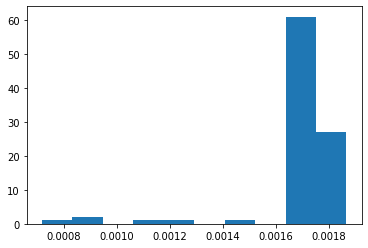

In [60]:
plt.hist(np.array(time_list).T[4])

In [ ]:
#np.isnan(M_get),M_get.shape

rho
#7363 7294 7367

In [146]:
7363/8444,7600/8444

(0.8719801042160114, 0.9000473709142587)

In [45]:
sum(np.argmax(gamma_new.cpu().numpy(),axis=1)==exp_data_meta_clusterid_clusteridunique.values),\

(7630,)

In [144]:
rho.shape

(12, 55)

In [90]:
#M_true.shape,
from scipy.stats import pearsonr
#M_get=np.array([np.mean(exp_data[marker_unique_exp_data_idx,:][:,np.argmax(gamma_new.cpu().numpy(),axis=1)==i],axis=1) for i in sorted(np.unique(np.argmax(gamma_new.cpu().numpy(),axis=1)))])
M_get=np.array([np.mean(exp_data[marker_unique_exp_data_idx,:][:,np.argmax(gamma_new.cpu().numpy(),axis=1)==i],axis=1) for i in range(rho.shape[0])])
M_get=np.nan_to_num(M_get,1)
type_mapping=[np.argmin([pearsonr(M_get[i],M_true[j])[1] for j in range(M_true.shape[0])]) for i in range(M_get.shape[0])]
sum(pd.Series(type_mapping)[np.argmax(gamma_value.cpu().numpy(),axis=1)].values==exp_data_meta_clusterid_clusteridunique.values)

/home/ch6845/tools/miniconda3/envs/pytorch/lib/python3.6/site-packages/scipy/stats/stats.py:3399: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


7478

In [68]:
len(type_mapping)

21

range(0, 24)

In [69]:
rho.shape

(24, 63)

In [61]:
pd.Series(type_mapping)[np.argmax(gamma_value.cpu().numpy(),axis=1)].values.shape,exp_data_meta_clusterid_clusteridunique.values.shape

((8444,), (8444,))

In [64]:
np.unique(exp_data_meta_clusterid_clusteridunique.values),M_true.shape

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), (11, 63))

In [52]:
delta_min

0

In [59]:
model.delta_log_min

-inf

In [93]:
model.delta_log.exp()

tensor([[5.5438, 6.8677, 6.4499,  ..., 6.0781, 8.0561, 6.3932],
        [6.3569, 6.0225, 6.1163,  ..., 6.1911, 5.7865, 6.9426],
        [6.3507, 5.1697, 5.0077,  ..., 5.5911, 5.8916, 5.6769],
        ...,
        [5.9142, 9.2594, 5.8219,  ..., 5.5893, 5.2697, 5.8865],
        [5.0248, 9.6543, 3.7499,  ..., 6.7895, 3.3872, 4.8630],
        [6.0585, 5.9672, 6.1915,  ..., 6.0775, 6.9236, 5.9648]],
       device='cuda:4', grad_fn=<ExpBackward>)

In [92]:
(model.delta_log.exp()[model.masked.mask]).flatten().min()

tensor(2.5065, device='cuda:4', grad_fn=<MinBackward1>)

(96,)

In [30]:
model=Custom_Model(Y,rho,X_col=X.shape[1],delta_min=delta_min,LOWER_BOUND=LOWER_BOUND,THETA_LOWER_BOUND=THETA_LOWER_BOUND).to(device)

/home/ch6845/tools/miniconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log


In [54]:
[cell_dataset[:]['Y'].shape,cell_dataset[:]['X'].size,cell_dataset[:]['s'].size]

[(8444, 63), 33776, 8444]

In [58]:
summary?

Signature: summary(model, input_size, batch_size=-1, device='cuda')
Docstring: <no docstring>
File:      ~/tools/miniconda3/envs/pytorch/lib/python3.6/site-packages/torchsummary/torchsummary.py
Type:      function


In [60]:
device

device(type='cuda', index=5)

In [62]:
from torchsummary import summary
summary(model,input_size=[cell_dataset[:]['Y'].shape,cell_dataset[:]['X'].shape,cell_dataset[:]['s'].shape],device='cuda')

RuntimeError: Expected object of scalar type Float but got scalar type Double for argument #2 'mat2' in call to _th_mm

In [31]:
for name,param in model.named_parameters():
    print(name,param.size())

delta_log torch.Size([12, 63])
delta_log_mean torch.Size([1])
delta_log_variance torch.Size([1])
beta torch.Size([4, 63])
NB_basis_mean torch.Size([10])
NB_basis_a torch.Size([10])
NB_basis_b torch.Size([10])
theta_logit torch.Size([12])
masked.mask torch.Size([12, 63])


In [48]:
for batch_idx,batch in enumerate(cell_dataloader):
    # It is usually just one iteration(batch).
    # However, developer of cellAssign may have done this for extreme situation of larse sample size
    batch_Y=batch['Y'].to(device)
    batch_X=batch['X'].to(device)
    batch_s=batch['s'].to(device)

Start time: 2020-05-03 13:35:28
tensor(-7669628.7273, device='cuda:5') tensor(-19.1671, device='cuda:5') tensor(-1178.8088, device='cuda:5')
tensor(-7670826.7032, device='cuda:5')
tensor(7671773.7737, device='cuda:5')
M: 0, Q: 7671773.7736541815 Q_diff: 0.0
M: 20, Q: 2566880.1658998225 Q_diff: 0.6654124272127515
M: 40, Q: 2049999.058519762 Q_diff: 0.20136549974036955
M: 60, Q: 1881904.480737453 Q_diff: 0.08199739267377253
M: 80, Q: 1805504.3614400132 Q_diff: 0.040597235449219705
M: 100, Q: 1761565.7056747677 Q_diff: 0.024335945513973365
M: 120, Q: 1733824.8860063814 Q_diff: 0.015747820009790803
M: 140, Q: 1715936.6013248402 Q_diff: 0.010317238393517503
M: 160, Q: 1704009.9663510057 Q_diff: 0.006950510272131375
M: 180, Q: 1695831.3038760908 Q_diff: 0.004799656478787409
M: 200, Q: 1690110.1844792143 Q_diff: 0.00337363709692115
M: 220, Q: 1686048.270426146 Q_diff: 0.0024033427467451715
M: 240, Q: 1683130.947574422 Q_diff: 0.0017302724381589873
M: 260, Q: 1681017.1755881426 Q_diff: 0.00125

In [32]:
# Total 8444 cells
#NB              7640 LL: -271628 90sec 9iters
#NB(old markers) 7362 LL: -241538 90sec 13iters
#Poisson         7300 LL: -1116555 40sec 9iters 
#Normal          3369  LL: -783656280 doesn't_converge
#

In [54]:
#model.delta_log_min
exp_data_col_patient

array([1, 1, 1, ..., 5, 5, 5])

In [82]:
pd.DataFrame(np.array(np.unique(exp_data_meta_clusterid_clusteridunique.values[exp_data_col_patient==3],return_counts=True)))

,0,1,2,3,4,5,6,7,8
0,0,2,3,4,5,6,7,9,10
1,41,2621,156,24,244,2,1,29,9


In [84]:
#pd.DataFrame([np.unique(exp_data_meta_clusterid_clusteridunique.values[exp_data_col_patient==i],return_counts=True) for i in range(1,6)]).T
pd.concat([pd.DataFrame(np.array(np.unique(exp_data_meta_clusterid_clusteridunique.values[exp_data_col_patient==i],return_counts=True))).T.set_index(0) for i in range(1,6)],axis=1).fillna(0).astype(int)

,1,1,1,1,1
0,,,,,
0,8,23,41,13,34
1,7,7,0,34,81
2,96,629,2621,43,112
3,212,85,156,151,240
4,8,0,24,2,3
5,283,123,244,294,248
6,275,1,2,305,378
7,82,5,1,192,289
8,92,0,0,199,197


In [ ]:
#1,2 7607
# 7639
#1,2,4 7663
# 4485

#3 7600개
#2 7600개
#0  (1이상)

In [33]:
full0=pd.read_csv('data/analysis/cellassign_fit.prob.tsv',sep='\t').values#.idxmax(axis=1)#.value_counts()
full1=pd.read_csv('data/analysis/cellassign_fit_full.prob.tsv',sep='\t').values#.idxmax(axis=1)#.value_counts()
full2=pd.read_csv('data/analysis/cellassign_fit_full2.prob.tsv',sep='\t').values#.idxmax(axis=1)#.value_counts()
full3=pd.read_csv('data/analysis/cellassign_fit_full3.prob.tsv',sep='\t').values#.idxmax(axis=1)#.value_counts()

In [34]:
sum(np.argmax(full0,axis=1)==exp_data_meta_clusterid_clusteridunique.values),\
sum(np.argmax(full1,axis=1)==exp_data_meta_clusterid_clusteridunique.values),\
sum(np.argmax(full2,axis=1)==exp_data_meta_clusterid_clusteridunique.values),\
sum(np.argmax(full3,axis=1)==exp_data_meta_clusterid_clusteridunique.values),\
sum(np.argmax(test3,axis=1)==exp_data_meta_clusterid_clusteridunique.values),\
sum(np.argmax(gamma_new.cpu().numpy(),axis=1)==exp_data_meta_clusterid_clusteridunique.values),\

NameError: name 'test3' is not defined

In [ ]:
np.unique(exp_data_meta_clusterid_clusteridunique.values,return_counts=True)

In [35]:
np.unique(np.argmax(gamma_value.cpu().numpy(),axis=1),return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 array([ 125,  115, 3558,  741,   50, 1177,  602,  750,  664,  539,  121,
           2]))

In [36]:
dict(model.named_parameters())

{'delta_log': Parameter containing:
 tensor([[0.6931, 0.6931, 0.6931, 0.6931, 0.6931, 0.6931, 0.6931, 0.6931, 0.6931,
          0.9312, 0.6931, 0.6931, 1.4206, 1.5949, 0.6931, 0.6931, 0.6931, 0.6931,
          1.6822, 1.9177, 1.8566, 0.6931, 0.6931, 0.6931, 1.5274, 0.6931, 1.6235,
          1.5616, 1.5839, 1.7507, 0.6931, 1.9307, 0.6931, 1.2182, 1.7909, 0.6931,
          0.6931, 0.6931, 0.6931, 0.6931, 0.6931, 0.6931, 1.5505, 1.8670, 1.9099,
          1.8641, 1.5157, 1.7668, 1.7909, 0.6931, 1.8040, 0.6931, 0.6931, 0.6931,
          0.6931, 1.9931, 1.5128, 1.6299, 1.7888, 1.3055, 2.1360, 0.6931, 0.6931],
         [0.6931, 0.6931, 0.6931, 1.1388, 1.8762, 1.5920, 0.8309, 1.0070, 0.6931,
          1.3236, 1.3432, 0.9883, 0.6931, 0.6931, 0.6931, 0.8321, 0.6931, 1.9308,
          0.6931, 1.8264, 0.6931, 1.1021, 1.2913, 0.6931, 0.6931, 0.6931, 0.6931,
          0.6931, 1.2296, 0.6931, 0.6931, 0.6931, 0.6931, 0.6931, 0.6931, 0.6931,
          1.7357, 1.8895, 1.8848, 0.6931, 0.6931, 1.1758, 0.6

In [ ]:
print(datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'))
with torch.no_grad():
    for batch_idx,batch in enumerate(cell_dataloader):
        batch_Y=batch['Y'].to(device)
        batch_X=batch['X'].to(device)
        batch_s=batch['s'].to(device)    
    gamma_fixed,_,LL_old=model(batch_Y,batch_X,batch_s,gamma_fixed=None,mode='LL')
    _,Q_old,_=model(batch_Y,batch_X,batch_s,gamma_fixed=gamma_fixed,mode='M')
    
print(LL_old)
print(Q_old)


from torchviz import make_dot, make_dot_from_trace

make_dot(model(batch_Y,batch_X,batch_s,gamma_fixed=gamma_fixed,mode='M')[1],params=dict(model.named_parameters()))